In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle 
import pandas as pd
from datetime import date
from sklearn.cluster import KMeans

from IPython.display import HTML
from matplotlib import animation, rc
from matplotlib import style
#rc('animation', html='html5')

from datetime import datetime

import sys
sys.path.append('./../')
from utility.eval_metric import _measure_metric,accuracy

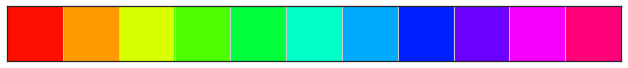

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
#sns.set_style('whitegrid')
import matplotlib
plt.rcParams["axes.grid"] = True
plt.rc('font', family='serif')
#plt.rc('font', weight='bold')

#current_palette = sns.color_palette(sns.hls_palette(5+1, l=.6, s=1.0))
current_palette = sns.color_palette(sns.hls_palette(10+1, l=.5, s=1.0))
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [3]:
saved_pickle_path = './result_pickle_aiedu2/'
#saved_pickle_path = './result_pickle_scalable_exp1-2/'
format_name = '.pickle'

In [4]:
# def get_together(saved_pickle_path, saved_filename1, saved_filename2, format_name):
#     with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
#         result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
#     with open(saved_pickle_path + saved_filename2 + format_name, 'rb') as f:
#         result_pickle2 = pickle.load(f) # 단 한줄씩 읽어옴       
#     result_pickle = {}
#     result_pickle['train_elbo'] = result_pickle1['train_elbo'] + result_pickle2['train_elbo']
#     result_pickle['train_accuracy'] = result_pickle1['train_accuracy'] + result_pickle2['train_accuracy']
#     result_pickle['test_elbo'] = result_pickle1['test_elbo'] + result_pickle2['test_elbo']
#     result_pickle['test_accuracy'] = result_pickle1['test_accuracy'] + result_pickle2['test_accuracy']
#     result_pickle['test_pred'] = result_pickle1['test_pred'] + result_pickle2['test_pred']
#     result_pickle['Trained_Model'] = result_pickle1['Trained_Model'] + result_pickle2['Trained_Model']
#     result_pickle['train_time'] = result_pickle1['train_time'] + result_pickle2['train_time']
#     result_pickle['num_cluster_list'] = result_pickle1['num_cluster_list'] + result_pickle2['num_cluster_list']
#     result_pickle['test_elbo_before'] = result_pickle1['test_elbo_before'] + result_pickle2['test_elbo_before']
#     result_pickle['test_accuracy_before'] = result_pickle1['test_accuracy_before'] + result_pickle2['test_accuracy_before']
#     result_pickle['Data_setting'] = result_pickle1['Data_setting']
#     result_pickle['Exp_setting'] = result_pickle1['Exp_setting']
#     result_pickle['HMMGP_setting'] = result_pickle1['HMMGP_setting']
#     result_pickle['Exp_setting']['num_rep_exp'] = result_pickle1['Exp_setting']['num_rep_exp']  + result_pickle2['Exp_setting']['num_rep_exp'] 
#     #return result_pickle1, result_pickle2
#     return result_pickle

In [5]:
import glob

In [6]:
def get_result(saved_pickle_path, saved_filename1, format_name):
    with open(saved_pickle_path + saved_filename1 + format_name, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1

def load_pickle(pickle_filepath):
    with open(pickle_filepath, 'rb') as f:
        result_pickle1 = pickle.load(f) # 단 한줄씩 읽어옴
    return result_pickle1
    

In [7]:
#filenamelist
#target_filenamelist

In [8]:
def get_results(target_target_filenamelist):
    results = {}
    for ith_target_filename in target_target_filenamelist:
        loaded_pickle = load_pickle(ith_target_filename)
        #loaded_pickle.keys()
        emission,train,totalspt = loaded_pickle['HMMGP_setting']['emission'],loaded_pickle['HMMGP_setting']['train'],loaded_pickle['HMMGP_setting']['Num_RRFFSpectralPt_total']
        numQ,numhidden,numrepexp = loaded_pickle['Exp_setting']['Num_Q'],loaded_pickle['Exp_setting']['Num_HiddenState'],loaded_pickle['Exp_setting']['num_rep_exp']
        sublen,fulllen = loaded_pickle['HMMGP_setting']['Len_Batch'], loaded_pickle['HMMGP_setting']['Len_Full']
        modeldescription = (numhidden,emission,train,numQ,fulllen,sublen,totalspt)
        
        #print(loaded_pickle.keys())
        
        
        target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
        
#         target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list',
#                              'etr_lik_list', 'ete_lik_list', 'etrain_accuracy_list', 'etest_accuracy_list']
        try:
            static = {}
            for ith_key in target_eval_list:
                mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
                #static[ith_key] = (mean[0],std[0],mean[-1],std[-1])      
                if ith_key in ['train_accuracy_list', 'test_accuracy_list']:
                    static[ith_key] = (mean[0],(std[0]/np.sqrt(numrepexp)).round(3),mean[-1],(std[-1]/np.sqrt(numrepexp)).round(3))      

                else:
    #                     if ith_key in ['tr_lik_list','etr_lik_list']:
    #                         numdat=100*1000
    #                         static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))                             
    #                     elif ith_key in ['te_lik_list', 'ete_lik_list']:
    #                         numdat=50*1000
    #                         static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))     
    #                     else:
    #                         static[ith_key] = (mean[-1].round(3),(std[-1]/np.sqrt(numrepexp)).round(3))      

                    if ith_key in ['tr_lik_list','etr_lik_list']:
                        numdat=100*200
                        static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))                             
                        #static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/numdat).round(3))                             

                    elif ith_key in ['te_lik_list', 'ete_lik_list']:
                        numdat=50*200
                        static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/(numdat*np.sqrt(numrepexp))).round(3))     
                        #static[ith_key] = ((mean[-1]/numdat).round(3),(std[-1]/numdat).round(3))     

                    else:
                        static[ith_key] = (mean[-1].round(3),(std[-1]/np.sqrt(numrepexp)).round(3))      
                        #static[ith_key] = (mean[-1].round(3),(std[-1]/1).round(3))      


            results[modeldescription] = static
        except:
            pass
    return results










def get_drawresults(target_target_filenamelist):
    results = {}
    for ith_target_filename in target_target_filenamelist:
        loaded_pickle = load_pickle(ith_target_filename)
        #loaded_pickle.keys()
        emission,train,totalspt = loaded_pickle['HMMGP_setting']['emission'],loaded_pickle['HMMGP_setting']['train'],loaded_pickle['HMMGP_setting']['Num_RRFFSpectralPt_total']
        numQ,numhidden,numrepexp = loaded_pickle['Exp_setting']['Num_Q'],loaded_pickle['Exp_setting']['Num_HiddenState'],loaded_pickle['Exp_setting']['num_rep_exp']
        sublen,fulllen = loaded_pickle['HMMGP_setting']['Len_Batch'], loaded_pickle['HMMGP_setting']['Len_Full']
        modeldescription = (numhidden,emission,train,numQ,fulllen,sublen,totalspt)

        target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
#         static = {}        
#         for ith_key in target_eval_list:
#             mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
#             if ith_key in ['train_time']:
#                 print(np.cumsum(mean))
#                 static[ith_key] = (np.cumsum(mean))      
#             else:
#                 static[ith_key] = (mean,std)    

#         results[modeldescription] = static
        
        try:
            static = {}
            for ith_key in target_eval_list:
                mean,std = np.asarray(loaded_pickle[ith_key]).mean(axis=0).round(3),np.asarray(loaded_pickle[ith_key]).std(axis=0).round(3)
                if ith_key in ['train_time']:
                    static[ith_key] = (np.cumsum(mean))      
                else:
                    #static[ith_key] = (mean,std)
                    static[ith_key] = (mean,(std[-1]/np.sqrt(numrepexp)).round(3))
                    
                
            results[modeldescription] = static
        except:
            pass
        
        
        
            
    return results

In [9]:
import copy 
from collections import OrderedDict

target_eval_list = [ 'tr_elbo_list', 'tr_lik_list', 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
#target_eval_list = [ 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']

def filter_results(results_dict,numhidden=4,numQ=4,target_eval_list=['tr_elbo_list']):
    print('#'*200)
    print('#'*200)    
    #tmp_dict = OrderedDict()
    tmp_dict = {}
    #ordered_result = OrderedDict()
    for ith_key in results_dict:
        if ith_key[0] == numhidden and ith_key[3]==numQ:
            if ith_key[1] == 'gpsm':
                tmp_dict[int(ith_key[-2])] = ith_key
            else:                
                tmp_dict[int(ith_key[-1])] = ith_key

    result_dict_cp  = OrderedDict()          
    for ith in sorted(tmp_dict.items()):
        #print(ith)
        ith_key = ith[1]        
        print('(numhidden,emission,train,numQ,fulllen,sublen,totalspt)='+ str(ith_key))        
        for iith_key in target_eval_list:            
            #print(iith_key,results_dict[ith_key][iith_key])     #'start,final'           
            print(iith_key,results_dict[ith_key][iith_key][-2:]) #'final'
        print('')
        result_dict_cp[iith_key] = results_dict[ith_key]
        
    return result_dict_cp



def filter_results_draw(results_dict,numhidden=4,numQ=4,target_eval_list=['tr_elbo_list']):
#     result_dict_cp = copy.deepcopy(result_dict)
#     for ith_key in result_dict_cp :
#         if ith_key[0] == numhidden and ith_key[3]==numQ:
#             pass
#         else:
#             result_dict_cp[ith_key] = None
    tmp_dict = {}
    for ith_key in results_dict:
        if ith_key[0] == numhidden and ith_key[3]==numQ:
            if ith_key[1] == 'gpsm':
                tmp_dict[int(ith_key[-2])] = ith_key
            else:                
                tmp_dict[int(ith_key[-1])] = ith_key

    result_dict_cp  = OrderedDict()          
    for ith in sorted(tmp_dict.items()):
        #print(ith)
        result_dict_cp[ith[1]] = results_dict[ith[1]]

    return result_dict_cp 

In [10]:
# target_eval_list = [ 'te_elbo_list', 'ete_lik_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'etrain_accuracy_list', 'etest_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
# #results_draw = get_drawresults(target_filenamelist)
# results1_draw = filter_results(results1_f,numhidden=8,numQ=3,target_eval_list=target_eval_list)
# target_result = filter_results_draw(results_draw,numhidden=8,numQ=3,target_eval_list=target_eval_list)
#filter_results(results,numhidden=8,numQ=3,target_eval_list=target_eval_list)

#results_draw = get_drawresults(target_filenamelist)
#target_result = filter_results_draw(results_draw,numhidden=8,numQ=4,target_eval_list=target_eval_list)
#results1_ff = filter_results(results1_f,numhidden=8,numQ=3,target_eval_list=target_eval_list)


In [11]:
#target_result

## exp1

In [12]:
# filenamelist = glob.glob(saved_pickle_path + '*' + format_name)
# len(filenamelist)

In [13]:
filenamelist = glob.glob(saved_pickle_path + '*' + format_name)

target_filenamelist = []
target_filenamelist2 = []
for ith_filelist in filenamelist:
    #print(ith_filelist.split('/')[-1].split('_'))
    if ith_filelist.split('/')[-1].split('_')[-1][:9] == 'numhidden':                
        if ith_filelist.split('_')[5] == 'emissiongpsm': #aidedu2
        #if ith_filelist.split('_')[6] == 'emissiongpsm':  #scalable1-2          

            target_filenamelist.append(ith_filelist)
        else:
            target_filenamelist2.append(ith_filelist)
            
        #print(ith_filelist)

In [14]:
#target_filenamelist

In [46]:
#target_eval_list = [ 'te_lik_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
target_eval_list = [ 'test_accuracy_list', 'te_lik_list',  'train_time']
results = get_results(target_filenamelist)
# filter_results(results,numhidden=4,numQ=4,target_eval_list=target_eval_list)
#filter_results(results,numhidden=8,numQ=6,target_eval_list=target_eval_list)
#filter_results(results,numhidden=8,numQ=4,target_eval_list=target_eval_list)


#filter_results(results,numhidden=8,numQ=4,target_eval_list=target_eval_list)

In [54]:
filter_results(results,numhidden=6,numQ=3,target_eval_list=target_eval_list)

filter_results(results,numhidden=6,numQ=4,target_eval_list=target_eval_list)


########################################################################################################################################################################################################
########################################################################################################################################################################################################
(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(6, 'gpsm', 'SVI', 3, 100, 10, 200)
test_accuracy_list (0.656, 0.013)
te_lik_list (-3.316, 0.092)
train_time (44.708, 0.426)

(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(6, 'gpsm', 'SVI', 3, 100, 20, 200)
test_accuracy_list (0.7, 0.006)
te_lik_list (-2.945, 0.066)
train_time (88.889, 0.689)

(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(6, 'gpsm', 'SVI', 3, 100, 50, 200)
test_accuracy_list (0.724, 0.004)
te_lik_list (-2.527, 0.046)
train_time (224.707, 2.141)

(numhidden,emission,train,numQ,fulllen,sublen,totalsp

OrderedDict([('train_time',
              {'tr_elbo_list': (-189424.592, 0.0),
               'tr_lik_list': (-3.827, 0.0),
               'te_elbo_list': (-86472.999, 0.0),
               'te_lik_list': (-2.917, 0.0),
               'train_accuracy_list': (0.59, 0.0, 0.62, 0.0),
               'test_accuracy_list': (0.54, 0.0, 0.62, 0.0),
               'train_time': (592.677, 0.0),
               'num_cluster_list': (6.0, 0.0),
               'bic_list': (59453.55, 0.0)})])

In [17]:
filter_results(results,numhidden=8,numQ=3,target_eval_list=target_eval_list)
filter_results(results,numhidden=8,numQ=4,target_eval_list=target_eval_list)


########################################################################################################################################################################################################
########################################################################################################################################################################################################
(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(8, 'gpsm', 'SVI', 3, 100, 10, 200)
test_accuracy_list (0.524, 0.032)
te_lik_list (-3.011, 0.125)
train_time (78.754, 0.935)

(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(8, 'gpsm', 'SVI', 3, 100, 20, 200)
test_accuracy_list (0.5, 0.021)
te_lik_list (-2.808, 0.048)
train_time (159.039, 3.057)

(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(8, 'gpsm', 'SVI', 3, 100, 50, 200)
test_accuracy_list (0.504, 0.013)
te_lik_list (-2.519, 0.043)
train_time (392.26, 2.163)

(numhidden,emission,train,numQ,fulllen,sublen,totalsp

OrderedDict([('train_time',
              {'tr_elbo_list': (-143886.443, 0.0),
               'tr_lik_list': (-0.391, 0.0),
               'te_elbo_list': (-83646.587, 0.0),
               'te_lik_list': (-1.279, 0.0),
               'train_accuracy_list': (0.58, 0.0, 0.68, 0.0),
               'test_accuracy_list': (0.52, 0.0, 0.68, 0.0),
               'train_time': (988.797, 0.0),
               'num_cluster_list': (7.0, 0.0),
               'bic_list': (27199.913, 0.0)})])

In [18]:
target_eval_list = [ 'te_elbo_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']


In [19]:
save_figure_path = './result_fig/exp1-1_new/'
try : 
    os.makedirs(save_figure_path) if ~os.path.exists(save_figure_path) else 1
except:
    pass

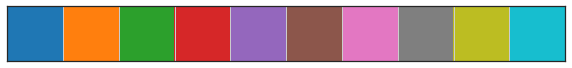

In [20]:
#current_palette = sns.color_palette(sns.hls_palette(7+1, l=.5, s=1.0))
current_palette = sns.color_palette('tab10')
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [21]:
#label_list = [  'SVI-SM L=10,Q=4','SVI-SM-RF L=10,Q=4,R=0.1','SVI-SM-RF L=10,Q=4,R=0.2']
def _transform_dict2name(ith_key):
    if ith_key[1] == 'gpsm' and ith_key[2] == 'SVI': 
        return 'SVI-SM L={},Q={}'.format(ith_key[-2],ith_key[3])
    elif ith_key[1] == 'gpsm' and ith_key[2] != 'SVI': 
        return 'VI-SM T={},Q={}'.format(ith_key[-2],ith_key[3])
    
    elif ith_key[1] == 'gprrff_beta' and ith_key[2] == 'SVI':
        return 'SVI-SM-RF L={},Q={},R={}'.format(ith_key[-2],ith_key[3],ith_key[-1]/1000)
    else:
        pass
    #(8, 'gpsm', 'SVI', 3, 100, 10, 1000)

In [22]:
#results

In [23]:
# results = get_results(target_filenamelist)
# filter_results(results,numhidden=8,numQ=3,target_eval_list=target_eval_list)
# filter_results(results,numhidden=8,numQ=4,target_eval_list=target_eval_list)


In [49]:
# target_eval_list = [ 'te_elbo_list', 'ete_lik_list', 'te_lik_list', 'train_accuracy_list', 'test_accuracy_list', 'etrain_accuracy_list', 'etest_accuracy_list', 'train_time', 'num_cluster_list', 'bic_list']
# #results_draw = get_drawresults(target_filenamelist)
# results1_draw = filter_results(results1_f,numhidden=8,numQ=3,target_eval_list=target_eval_list)
# target_result = filter_results_draw(results_draw,numhidden=8,numQ=3,target_eval_list=target_eval_list)
#filter_results(results,numhidden=8,numQ=3,target_eval_list=target_eval_list)

results_draw = get_drawresults(target_filenamelist)
#target_result = filter_results_draw(results_draw,numhidden=10,numQ=3,target_eval_list=target_eval_list) #'best figure'

#target_result = filter_results_draw(results_draw,numhidden=8,numQ=4,target_eval_list=target_eval_list)
target_result = filter_results_draw(results_draw,numhidden=6,numQ=4,target_eval_list=target_eval_list)


In [59]:
len(mean)

40

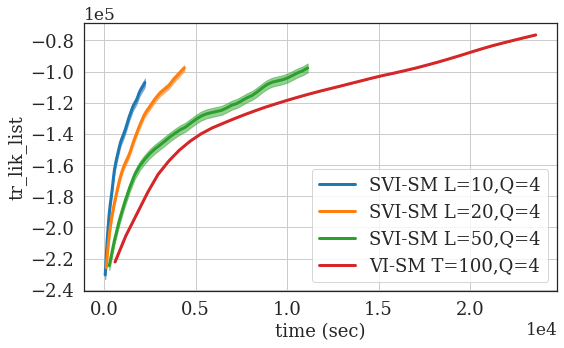

In [50]:
from matplotlib.ticker import FuncFormatter
# import matplotlib.ticker as ptick
# ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 


#target_result = filter_results_draw(results_draw ,numhidden=10,numQ=5,target_eval_list=target_eval_list)
#draw_static = 'te_elbo_list'
draw_static = 'tr_lik_list'
#draw_static = 'ete_lik_list'

#draw_static = 'test_accuracy_list'


#figsiz=(10,4)
figsiz=(8,5)
fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
#for ith,ith_key in zip(color_list,target_result):
ith=0
for jth,ith_key in enumerate(target_result):
    
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label =  _transform_dict2name(ith_key) ,color = current_palette[ith] )
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5,
                         edgecolor= current_palette[ith], facecolor= current_palette[ith]) 

        ith+=1

plt.minorticks_off()

#plt.xscale('log',basex=2) 
plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
plt.xlabel('time (sec)',fontsize = 18)
plt.ylabel(draw_static,fontsize =  18)




# plt.locator_params(axis='y', nbins=8)
# plt.locator_params(axis='x', nbins=6)
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
#plt.gca().xaxis.offset_text().set_fontsize(16)

plt.gca().yaxis.get_offset_text().set_size(17)
plt.gca().xaxis.get_offset_text().set_size(17)


plt.legend(loc='best',fontsize = 18)
fig.tight_layout()    
#plt.savefig(save_figure_path + 'train_accuracy_log'  + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()






In [51]:
ylim_=[0.48,0.7]

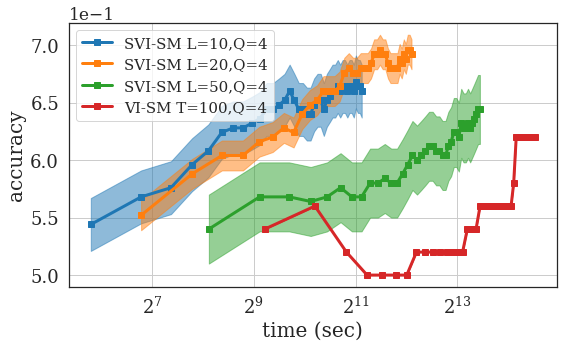

'./result_fig/exp1-1_new/test_accuracy_list.pdf'

In [52]:
#draw_static = 'train_accuracy_list'
#draw_static = 'etrain_accuracy_list'
draw_static = 'test_accuracy_list'
#draw_static = 'etest_accuracy_list'

#figsiz=(10,4)
figsiz=(8,5)
#figsiz=(9,6)

fig = plt.figure(figsize = figsiz)
#for ith,train_time_mean, y_train_mean,y_train_std,ith_label in zip(color_list,train_time_mean_list ,y_train_accuracy_mean_list,y_train_accuracy_std_list,label_list):
ith=0
for jth,ith_key in enumerate(target_result):
    if target_result[ith_key] is not None:
        mean,stderr = target_result[ith_key][draw_static]
        iteration = target_result[ith_key]['train_time']
        #iteration = np.arange(1,len(mean)+1)

        plt.plot(iteration ,mean , linewidth = 3.0 ,label =  _transform_dict2name(ith_key) ,color = current_palette[ith],linestyle='-',marker='s' )
        plt.fill_between(iteration, mean-stderr, mean+stderr, alpha=0.5,
                         edgecolor= current_palette[ith], facecolor= current_palette[ith]) 
        ith+=1
        
plt.xticks([2**10,2**11,2**12,2**13,2**14,2**15],fontsize =  18)
#plt.xticks(fontsize =  18)
#plt.yticks([0.4,0.5,0.55,0.6,0.65,0.7],fontsize = 18)
#plt.xticks([2**7,2**9,2**11,2**13,2**15],fontsize = 18)

plt.minorticks_off()
plt.xlabel('time (sec)',fontsize = 20)
#plt.ylabel(draw_static,fontsize =  18)
plt.ylabel('accuracy',fontsize =  20)
#plt.ylim(ylim_)




plt.xticks(fontsize =  18)
plt.yticks(fontsize = 18)
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(17)
plt.gca().xaxis.get_offset_text().set_size(17)

plt.xscale('log',basex=2) 




leg=plt.legend(loc='best',fontsize = 15)
for line in leg.get_lines():
    line.set_linewidth(3)    
    
    
fig.tight_layout()    
plt.savefig(save_figure_path + draw_static   + '.pdf' , format='pdf', dpi=1000, bbox_inches='tight')
plt.show()


save_figure_path + draw_static   + '.pdf' 

In [53]:
results.keys()

dict_keys([(6, 'gpsm', 'SVI', 3, 100, 50, 200), (10, 'gpsm', 'VBEM', 4, 100, 100, 200), (4, 'gpsm', 'SVI', 3, 100, 50, 200), (8, 'gpsm', 'SVI', 4, 100, 10, 200), (8, 'gpsm', 'SVI', 3, 100, 50, 200), (6, 'gpsm', 'VBEM', 3, 100, 100, 200), (8, 'gpsm', 'SVI', 4, 100, 50, 200), (8, 'gpsm', 'SVI', 3, 100, 20, 200), (8, 'gpsm', 'VBEM', 4, 100, 100, 200), (4, 'gpsm', 'SVI', 3, 100, 10, 200), (6, 'gpsm', 'SVI', 3, 100, 20, 200), (8, 'gpsm', 'SVI', 3, 100, 10, 200), (10, 'gpsm', 'SVI', 4, 100, 20, 200), (8, 'gpsm', 'SVI', 4, 100, 20, 200), (6, 'gpsm', 'SVI', 4, 100, 50, 200), (4, 'gpsm', 'SVI', 4, 100, 50, 200), (6, 'gpsm', 'VBEM', 4, 100, 100, 200), (4, 'gpsm', 'VBEM', 4, 100, 100, 200), (4, 'gpsm', 'SVI', 3, 100, 20, 200), (6, 'gpsm', 'SVI', 4, 100, 10, 200), (6, 'gpsm', 'SVI', 3, 100, 10, 200), (6, 'gpsm', 'SVI', 4, 100, 20, 200), (4, 'gpsm', 'VBEM', 3, 100, 100, 200), (10, 'gpsm', 'SVI', 3, 100, 20, 200), (4, 'gpsm', 'SVI', 4, 100, 10, 200), (8, 'gpsm', 'VBEM', 3, 100, 100, 200), (4, 'gpsm'

In [29]:
target_eval_list = ['train_accuracy_list', 
                    'tr_lik_list',                      
                    'test_accuracy_list', 
                    'te_lik_list',
                    'train_time', 
                    'bic_list']


In [30]:
filter_results(results,numhidden=4,numQ=3,target_eval_list=target_eval_list)
filter_results(results,numhidden=6,numQ=3,target_eval_list=target_eval_list)
filter_results(results,numhidden=8,numQ=3,target_eval_list=target_eval_list)
#filter_results(results,numhidden=10,numQ=3,target_eval_list=target_eval_list)


########################################################################################################################################################################################################
########################################################################################################################################################################################################
(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(4, 'gpsm', 'SVI', 3, 100, 10, 200)
train_accuracy_list (0.574, 0.004)
tr_lik_list (-6.518, 0.042)
test_accuracy_list (0.56, 0.0)
te_lik_list (-3.324, 0.024)
train_time (20.766, 0.111)
bic_list (67022.992, 479.533)

(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(4, 'gpsm', 'SVI', 3, 100, 20, 200)
train_accuracy_list (0.588, 0.002)
tr_lik_list (-5.933, 0.026)
test_accuracy_list (0.548, 0.004)
te_lik_list (-3.007, 0.019)
train_time (40.063, 0.28)
bic_list (60687.097, 380.471)

(numhidden,emission,train,numQ,fulllen,sublen,totals

OrderedDict([('bic_list',
              {'tr_elbo_list': (-171886.763, 0.0),
               'tr_lik_list': (-2.339, 0.0),
               'te_elbo_list': (-87944.643, 0.0),
               'te_lik_list': (-2.345, 0.0),
               'train_accuracy_list': (0.52, 0.0, 0.52, 0.0),
               'test_accuracy_list': (0.44, 0.0, 0.46, 0.0),
               'train_time': (875.593, 0.0),
               'num_cluster_list': (8.0, 0.0),
               'bic_list': (48301.139, 0.0)})])

In [31]:
numQ=3

In [32]:
filter_results(results,numhidden=4,numQ=numQ,target_eval_list=target_eval_list)
filter_results(results,numhidden=6,numQ=numQ,target_eval_list=target_eval_list)
filter_results(results,numhidden=8,numQ=numQ,target_eval_list=target_eval_list)
filter_results(results,numhidden=10,numQ=numQ,target_eval_list=target_eval_list)

########################################################################################################################################################################################################
########################################################################################################################################################################################################
(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(4, 'gpsm', 'SVI', 3, 100, 10, 200)
train_accuracy_list (0.574, 0.004)
tr_lik_list (-6.518, 0.042)
test_accuracy_list (0.56, 0.0)
te_lik_list (-3.324, 0.024)
train_time (20.766, 0.111)
bic_list (67022.992, 479.533)

(numhidden,emission,train,numQ,fulllen,sublen,totalspt)=(4, 'gpsm', 'SVI', 3, 100, 20, 200)
train_accuracy_list (0.588, 0.002)
tr_lik_list (-5.933, 0.026)
test_accuracy_list (0.548, 0.004)
te_lik_list (-3.007, 0.019)
train_time (40.063, 0.28)
bic_list (60687.097, 380.471)

(numhidden,emission,train,numQ,fulllen,sublen,totals

OrderedDict([('bic_list',
              {'tr_elbo_list': (-179666.524, 0.0),
               'tr_lik_list': (-1.392, 0.0),
               'te_elbo_list': (-92339.433, 0.0),
               'te_lik_list': (-1.497, 0.0),
               'train_accuracy_list': (0.67, 0.0, 0.78, 0.0),
               'test_accuracy_list': (0.66, 0.0, 0.76, 0.0),
               'train_time': (2190.063, 0.0),
               'num_cluster_list': (8.0, 0.0),
               'bic_list': (31866.885, 0.0)})])

In [58]:
#results